In [218]:
#Data_Preparation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def data_prep():
    
    #import dataset
    df = pd.read_csv('D2.csv')
    
    #change to integer type
    df['alcohol'] = df['alcohol'].round().astype(int)
    df['contacts_count'] = df['contacts_count'].round().astype(int)
    df['house_count'] = df['house_count'].round().astype(int) 
    
    #change to categorical 
    age_map = {'30_40':4 ,'70_80':8, '50_60':6, '20_30':3, '60_70':7, '40_50':5, 
               '80_90':9,'90_100':10, '10_20':2,'0_10':1, '100_110':11}
    df['age'] = df['age'].map(age_map)    
    
    #change to binary
    insurance_map = {'yes':1, 'no':0}
    df['insurance'] = df['insurance'].map(insurance_map)
    immigrant_map = {'native':0, 'immigrant':1}
    df['immigrant'] = df['immigrant'].map(immigrant_map)
    
    #remove blood type
    df.drop(['blood_type'], axis=1, inplace=True)
    
    #one-hot encoding
    df = pd.get_dummies(df)
    
    #setting random state
    rs=10
    
    y = df['covid19_positive']
    X = df.drop(['covid19_positive'],axis=1)
    
    X_mat = X.to_numpy()
    X_train,X_test,y_train,y_test = train_test_split(X_mat,y,test_size=0.3,stratify=y,random_state=rs)
    
    return df,X,y,X_train,X_test,y_train,y_test

In [219]:
df,X,y,X_train,X_test,y_train,y_test = data_prep()
rs = 10
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 36 columns):
age                            6110 non-null int64
height                         6110 non-null int64
weight                         6110 non-null int64
insurance                      6110 non-null int64
immigrant                      6110 non-null int64
alcohol                        6110 non-null int32
contacts_count                 6110 non-null int32
house_count                    6110 non-null int32
worried                        6110 non-null int64
covid19_positive               6110 non-null int64
gender_female                  6110 non-null uint8
gender_male                    6110 non-null uint8
gender_other                   6110 non-null uint8
income_gov                     6110 non-null uint8
income_high                    6110 non-null uint8
income_low                     6110 non-null uint8
income_med                     6110 non-null uint8
race_asian                

In [220]:
#Standaridisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print("Before scaling\n--------------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min{}, max{}, mean{:.2f} and std dev{:.2f}".
          format(i,min(col),max(col),np.mean(col),np.std(col)))

X_train = scaler.fit_transform(X_train,y_train)

print("After scaling\n------------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min{}, max{}, mean{:.2f} and std dev{:.2f}".
          format(i,min(col),max(col),np.mean(col),np.std(col)))
    
X_test = scaler.transform(X_test)

Before scaling
--------------------
Variable #0: min1, max11, mean5.14 and std dev1.82
Variable #1: min110, max238, mean171.82 and std dev10.95
Variable #2: min44, max180, mean84.45 and std dev23.93
Variable #3: min0, max1, mean0.89 and std dev0.31
Variable #4: min0, max1, mean0.10 and std dev0.31
After scaling
------------------
Variable #0: min-2.282714205783765, max3.225109701548494, mean-0.00 and std dev1.00
Variable #1: min-5.646019606867985, max6.04457824596458, mean-0.00 and std dev1.00
Variable #2: min-1.6903772697732775, max3.992266536727259, mean-0.00 and std dev1.00
Variable #3: min-2.905426148390667, max0.34418358923142583, mean0.00 and std dev1.00
Variable #4: min-0.3403471164356589, max2.9381767957159473, mean0.00 and std dev1.00


In [221]:
#Logstic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=rs)
model.fit(X_train,y_train)


LogisticRegression(random_state=10)

In [222]:
#training and test accuracy
from sklearn.metrics import classification_report,accuracy_score

print("Train accuracy:",model.score(X_train,y_train))
print("Test accuracy:",model.score(X_test,y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


Train accuracy: 0.6841243862520459
Test accuracy: 0.6868521549372614
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1070
           1       0.64      0.57      0.60       763

    accuracy                           0.69      1833
   macro avg       0.68      0.67      0.67      1833
weighted avg       0.68      0.69      0.68      1833



In [223]:
feature_names = X.columns
coef = model.coef_[0]

for i in range(len(coef)):
    print(feature_names[i],':',coef[i])

age : -0.012767091547518072
height : -0.23661372710322431
weight : 0.2874884464731233
insurance : 0.13601316112067763
immigrant : -0.1386928273691582
alcohol : 0.006717829645060627
contacts_count : -0.009457212932557317
house_count : 0.2691816133179407
worried : 0.10488840752114385
gender_female : -0.0644556777895791
gender_male : 0.05699910916288844
gender_other : 0.07696770279026215
income_gov : 0.061051319582899166
income_high : -0.3666471863007343
income_low : 0.01774310519993163
income_med : 0.3235550910968556
race_asian : -0.0658340222407681
race_black : -0.007875213153456457
race_hispanic : 0.017080197698885486
race_mixed : 0.004472249840197184
race_other : 0.026380752716544793
race_white : 0.023610949887554307
smoking_never : -0.030355288596793054
smoking_quit0 : 0.027439098243703372
smoking_quit10 : 0.007342541764017042
smoking_quit5 : -0.04148527044309941
smoking_vape : 0.019901447804746817
smoking_yesheavy : 0.0039295066799503574
smoking_yeslight : 0.01158539183977317
smokin

In [224]:
feature_names = X.columns
coef = model.coef_[0]

indices = np.argsort(np.absolute(coef))
indices = np.flip(indices,axis=0)

indices = indices[:20]

for i in indices :
    print(feature_names[i],'i',coef[i])


income_high i -0.3666471863007343
income_med i 0.3235550910968556
weight i 0.2874884464731233
house_count i 0.2691816133179407
height i -0.23661372710322431
working_travel critical i 0.16490628126974896
immigrant i -0.1386928273691582
insurance i 0.13601316112067763
worried i 0.10488840752114385
working_home i -0.1001202435748289
working_travel non critical i -0.0910055186828215
gender_other i 0.07696770279026215
race_asian i -0.0658340222407681
gender_female i -0.0644556777895791
income_gov i 0.061051319582899166
smoking_yesmedium i 0.05738210863932158
gender_male i 0.05699910916288844
working_stopped i -0.044109190177310395
smoking_quit5 i -0.04148527044309941
smoking_never i -0.030355288596793054


In [225]:
#grid search CV
from sklearn.model_selection import GridSearchCV

params = {'C':[pow(10,x) for x in range(-6,4)]}

cv = GridSearchCV(param_grid=params,estimator=LogisticRegression(random_state=rs),return_train_score=True,cv=10,n_jobs=-1)
cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [226]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.03104448, 0.02677124, 0.02186153, 0.02101192, 0.02346253,
       0.0244139 , 0.02430639, 0.02741568, 0.02630794, 0.02576795]), 'std_fit_time': array([0.01032976, 0.00245736, 0.0023352 , 0.00241781, 0.00271445,
       0.00233479, 0.00477715, 0.00409455, 0.0028298 , 0.00240235]), 'mean_score_time': array([0.00188293, 0.00190825, 0.0011513 , 0.00100071, 0.00099993,
       0.00110028, 0.00140045, 0.00109961, 0.00100012, 0.00110059]), 'std_score_time': array([1.12001722e-03, 2.69870842e-03, 4.53562049e-04, 3.03279304e-06,
       9.88790577e-07, 3.00337815e-04, 8.01041178e-04, 2.99844147e-04,
       1.18635705e-06, 3.00869431e-04]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

Total number of models:  10


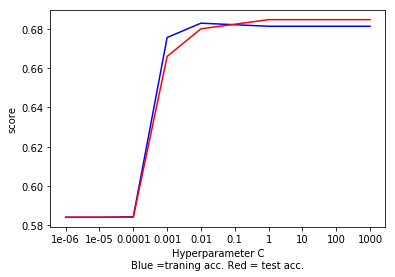

In [227]:
import  matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ",len(test_result))

plt.plot(range(0,len(train_result)),train_result,'b',range(0,len(test_result)),test_result,'r')
plt.xlabel('Hyperparameter C\nBlue =traning acc. Red = test acc.')
plt.xticks(range(0,len(train_result)),[pow(10,x) for x in range(-6,4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


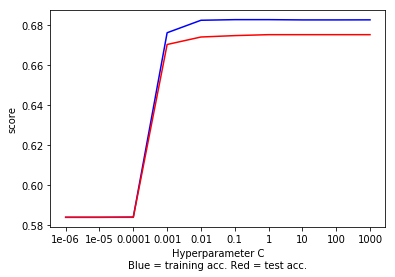

In [228]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [229]:
print(cv.best_params_)

{'C': 1}


In [230]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.6841243862520459
Test accuracy: 0.6868521549372614


In [231]:
best_model = cv.best_estimator_

feature_names = X.columns
coef = best_model.coef_[0]
    
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices,axis=0)

indices = indices[:5]

for i in indices :
    print(feature_names[i],'i',coef[i])


income_high i -0.3666471863007343
income_med i 0.3235550910968556
weight i 0.2874884464731233
house_count i 0.2691816133179407
height i -0.23661372710322431


In [232]:
print("Train accuracy:", best_model.score(X_train, y_train))
print("Test accuracy:",best_model.score(X_test, y_test))

y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

Train accuracy: 0.6841243862520459
Test accuracy: 0.6868521549372614
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1070
           1       0.64      0.57      0.60       763

    accuracy                           0.69      1833
   macro avg       0.68      0.67      0.67      1833
weighted avg       0.68      0.69      0.68      1833



In [233]:
#task3
#Feature Selection using Recursive Feature Elimination

from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 35
Number of features after elimination 14


In [234]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6815524900631283
Test accuracy: 0.6857610474631751
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1070
           1       0.64      0.56      0.60       763

    accuracy                           0.69      1833
   macro avg       0.68      0.67      0.67      1833
weighted avg       0.68      0.69      0.68      1833



Total number of models:  10


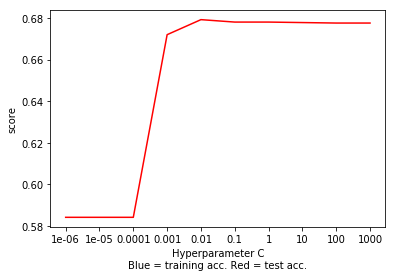

In [235]:
rfe_result_set = rfe_cv.cv_results_

rfe_test_result = rfe_result_set['mean_test_score']
print("Total number of models: ", len(rfe_test_result))

plt.plot(range(0,len(rfe_test_result)), rfe_test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(rfe_test_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [236]:
# print parameters of the best model
print(rfe_cv.best_params_)

{'C': 0.01}


In [237]:
rfe_best_model = rfe_cv.best_estimator_

feature_names = X.columns
coef = rfe_best_model.coef_[0]
    
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices,axis=0)

indices = indices[:3]

for i in indices :
    print(feature_names[i],'i',coef[i])


worried i -0.38332788565718834
gender_female i 0.26270486126373466
height i 0.25205530034917173


In [238]:
#task4
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)

roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)


ROC index on test for `model`: 0.7398206783356401
ROC index on test for `cv`: 0.7398206783356401
ROC index on test for `rfe_cv`: 0.7378682279736898


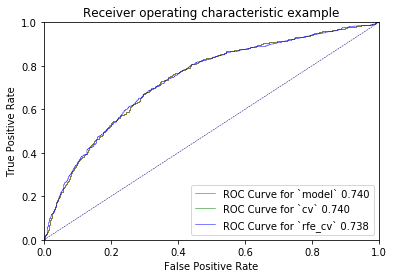

In [239]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])


plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
